In [ ]:
# ---------------------------------
# Parte 1.1 — Instalación
# ---------------------------------
!pip install -q ultralytics opencv-python matplotlib numpy pandas seaborn gdown kaggle norfair

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import os
import random
from google.colab import files
from IPython.display import Image, display

import ultralytics
print(f"Ultralytics version: {ultralytics.__version__}")

import torch
print(f"CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("⚠️ Usando CPU (fine-tuning será más lento)")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.26.1 requires rich>=13.7.1, but you have rich 12.6.0 which is incompatible.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settin

In [ ]:
# ---------------------------------
# Parte 1.2 — Cargar Modelo Base
# ---------------------------------
# Elegimos nano por velocidad en clase.
model_base = YOLO('yolov8n.pt')  # 'yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt'

print("\n=== MODELO BASE (COCO) ===")
print(f"Clases en COCO: {len(model_base.names)}")
print(f"Ejemplos de clases: {list(model_base.names.values())[:20]}")

grocery_relevant = ['apple', 'orange', 'banana', 'carrot', 'bottle', 'cup', 'bowl']
print(f"\nClases 'grocery' en COCO: {grocery_relevant}")
print("⚠️ Nota: COCO tiene clases genéricas, no productos específicos")




=== MODELO BASE (COCO) ===
Clases en COCO: 80
Ejemplos de clases: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow']

Clases 'grocery' en COCO: ['apple', 'orange', 'banana', 'carrot', 'bottle', 'cup', 'bowl']
⚠️ Nota: COCO tiene clases genéricas, no productos específicos



=== INFERENCIA CON MODELO BASE ===

image 1/1 /content/grocery_aisle.jpg: 480x640 3 oranges, 390.8ms
Speed: 20.8ms preprocess, 390.8ms inference, 37.8ms postprocess per image at shape (1, 3, 480, 640)


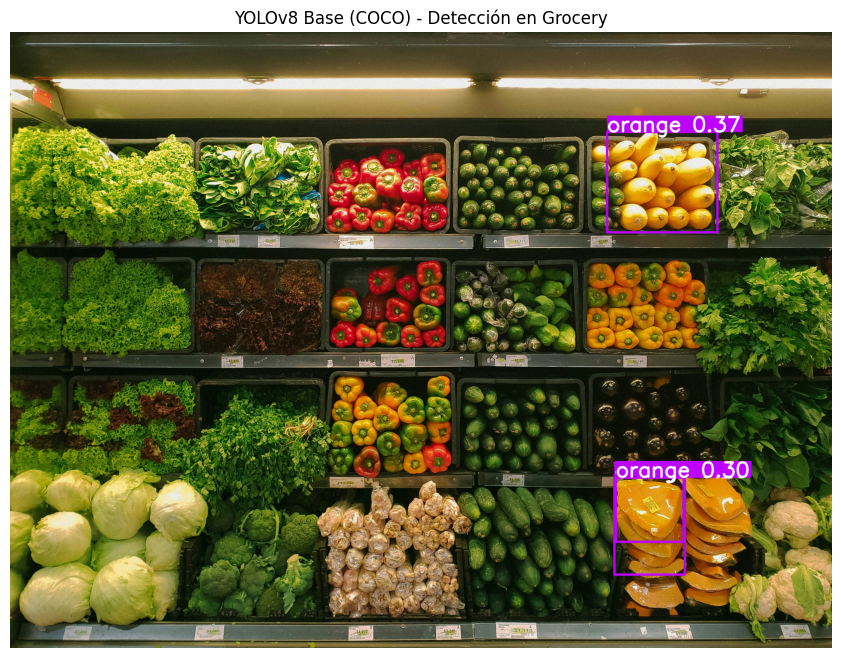


📊 Objetos detectados: 3
  1. orange: 0.367
  2. orange: 0.297
  3. orange: 0.289


In [ ]:
# ---------------------------------
# Parte 1.3 — Test en Imágenes de Grocery
# ---------------------------------
!wget -q https://images.unsplash.com/photo-1542838132-92c53300491e -O grocery_aisle.jpg

print("\n=== INFERENCIA CON MODELO BASE ===")
img_path = 'grocery_aisle.jpg'

if os.path.exists(img_path):
    # Usamos un conf intermedio (0.25) para ver detecciones pero sin mucho ruido
    results = model_base(img_path, conf=0.25)

    annotated = results[0].plot()
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('YOLOv8 Base (COCO) - Detección en Grocery')
    plt.show()

    boxes = results[0].boxes
    print(f"\n📊 Objetos detectados: {len(boxes)}")
    if len(boxes) > 0:
        for i, box in enumerate(boxes):
            cls_id = int(box.cls[0].cpu().numpy())
            conf = box.conf[0].cpu().numpy()
            class_name = model_base.names[cls_id]
            print(f"  {i+1}. {class_name}: {conf:.3f}")
    else:
        print("  ❌ No se detectaron objetos")
else:
    print(f"⚠️ Imagen no encontrada: {img_path}")
    print("   Por favor, descarga una imagen de productos de grocery")

In [ ]:
# TODO: Descargar "Fruit Detection Dataset" desde Kaggle

if not os.path.exists('kaggle.json'):
  print("Paso 1: Sube tu archivo kaggle.json")
  print("  (Ve a https://www.kaggle.com/settings → Create New API Token)")
  # Subir kaggle.json
  uploaded = files.upload()

  # Configurar Kaggle
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

# Instalar Kaggle CLI
!pip install -q kaggle

print("\n=== DESCARGANDO DATASET ===")
print("⏱️ Esto puede tomar 2-3 minutos...")

# Descargar dataset de frutas en formato YOLO
!kaggle datasets download -d lakshaytyagi01/fruit-detection
!unzip -q fruit-detection.zip -d fruit_detection

print("\n✅ Dataset descargado en: fruit_detection/")

# Explorar estructura
print("\n📁 Estructura del dataset:")
!ls -lh fruit_detection/

print("\n📂 Verificando carpetas:")
!ls fruit_detection/

# Contar imágenes por split
print("\n📊 Estadísticas:")
!find fruit_detection -name "*.jpg" -o -name "*.png" | wc -l | xargs echo "Total de imágenes:"

Paso 1: Sube tu archivo kaggle.json
  (Ve a https://www.kaggle.com/settings → Create New API Token)


Saving kaggle.json to kaggle.json

=== DESCARGANDO DATASET ===
⏱️ Esto puede tomar 2-3 minutos...
Dataset URL: https://www.kaggle.com/datasets/lakshaytyagi01/fruit-detection
License(s): CC0-1.0
 94% 471M/501M [00:03<00:00, 88.4MB/s]
100% 501M/501M [00:03<00:00, 172MB/s] 

✅ Dataset descargado en: fruit_detection/

📁 Estructura del dataset:
total 4.0K
drwxr-xr-x 5 root root 4.0K Nov  9 22:21 Fruits-detection

📂 Verificando carpetas:
Fruits-detection

📊 Estadísticas:
Total de imágenes: 8479


In [ ]:
# ---------------------------------
# Parte 2.1b — Verificar Estructura y data.yaml
# ---------------------------------
import yaml, glob

dataset_path = Path('fruit_detection')

print("\n=== VERIFICANDO ESTRUCTURA DEL DATASET ===")
print("\n📁 Estructura completa:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(str(dataset_path), '').count(os.sep)
    if level > 2:
        break
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    if level < 2:
        subindent = ' ' * 2 * (level + 1)
        for file in files[:3]:
            print(f'{subindent}{file}')
        if len(files) > 3:
            print(f'{subindent}... ({len(files)} archivos más)')

yaml_files = list(dataset_path.glob('**/data.yaml'))

if yaml_files:
    yaml_path = yaml_files[0]
    print(f"\n✅ Encontrado data.yaml en: {yaml_path}")
    with open(yaml_path, 'r') as f:
        data_config = yaml.safe_load(f)

    print(f"\n=== CONFIGURACIÓN DEL DATASET ===")
    print(f"Número de clases: {data_config.get('nc', 'N/A')}")
    print(f"Clases: {data_config.get('names', 'N/A')}")
    print(f"Train path: {data_config.get('train', 'N/A')}")
    print(f"Val path: {data_config.get('val', 'N/A')}")
    yaml_path_str = str(yaml_path)
else:
    print("\n⚠️ No se encontró data.yaml, creando uno...")

    train_dirs = list(dataset_path.glob('**/train/images')) + list(dataset_path.glob('**/images/train'))
    val_dirs = list(dataset_path.glob('**/valid/images')) + list(dataset_path.glob('**/val/images'))

    if train_dirs and val_dirs:
        train_path = str(train_dirs[0].relative_to(dataset_path))
        val_path = str(val_dirs[0].relative_to(dataset_path))
    else:
        train_path = 'train/images'
        val_path = 'valid/images'

    fruit_classes = ['apple', 'banana', 'grapes', 'orange', 'pineapple', 'watermelon']

    data_config = {
        'path': str(dataset_path.absolute()),
        'train': train_path,
        'val': val_path,
        'nc': len(fruit_classes),
        'names': fruit_classes
    }

    yaml_path = dataset_path / 'data.yaml'
    with open(yaml_path, 'w') as f:
        yaml.dump(data_config, f, default_flow_style=False)

    print(f"✅ data.yaml creado en: {yaml_path}")
    yaml_path_str = str(yaml_path)

# Contar imágenes reales
train_images = list(dataset_path.glob(f"{data_config['train']}/*.jpg")) + list(dataset_path.glob(f"{data_config['train']}/*.png"))
val_images = list(dataset_path.glob(f"{data_config['val']}/*.jpg")) + list(dataset_path.glob(f"{data_config['val']}/*.png"))

print(f"\n📊 ESTADÍSTICAS FINALES:")
print(f"  Train images: {len(train_images)}")
print(f"  Val images: {len(val_images)}")
print(f"  Total: {len(train_images) + len(val_images)}")
print(f"  Clases: {data_config['nc']}")


=== VERIFICANDO ESTRUCTURA DEL DATASET ===

📁 Estructura completa:
fruit_detection/
  Fruits-detection/
    README.txt
    yolov8s.pt
    cli.log
    ... (4 archivos más)
    valid/

✅ Encontrado data.yaml en: fruit_detection/Fruits-detection/data.yaml

=== CONFIGURACIÓN DEL DATASET ===
Número de clases: 6
Clases: ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon']
Train path: E:\DL\attempt1\attempt3\datasets\Fruits-detection-1\train\images
Val path: E:\DL\attempt1\attempt3\datasets\Fruits-detection-1\valid\images

📊 ESTADÍSTICAS FINALES:
  Train images: 0
  Val images: 0
  Total: 0
  Clases: 6



=== EXPLORANDO DATASET ===
Train labels: fruit_detection/Fruits-detection/train/labels
Val labels: fruit_detection/Fruits-detection/valid/labels

=== DISTRIBUCIÓN DE CLASES (TRAIN) ===
Total de clases: 6
Clases del dataset: ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon']

Apple               : 6070 instancias
Banana              : 2971 instancias
Grape               : 6027 instancias
Orange              : 13938 instancias
Pineapple           : 1372 instancias
Watermelon          : 1683 instancias


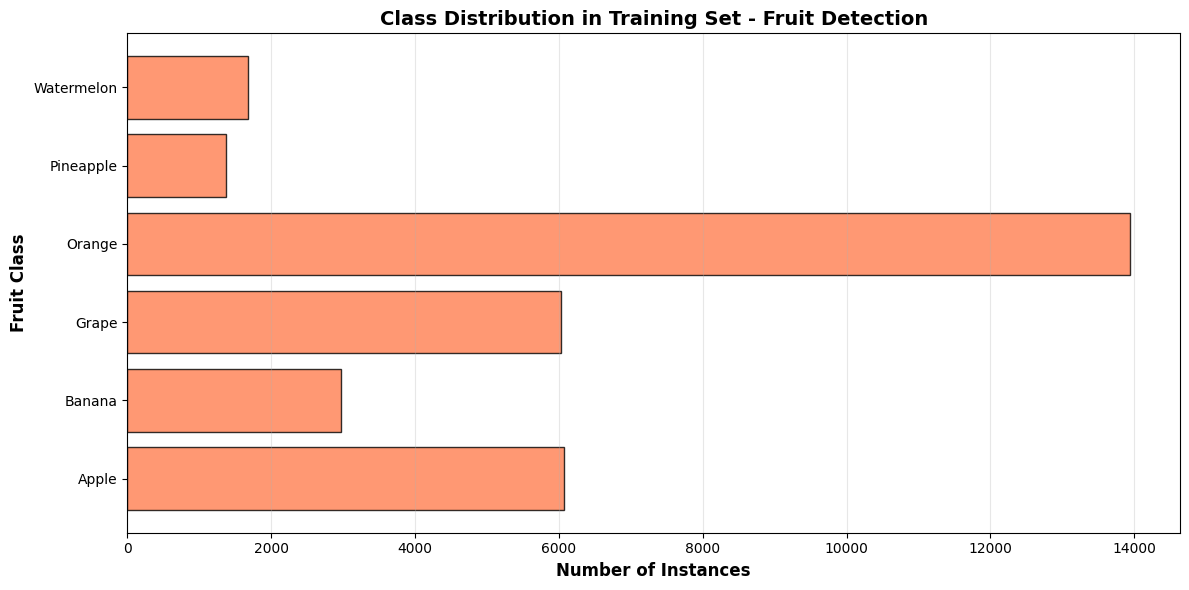


📊 ESTADÍSTICAS ADICIONALES:
  Instancias totales: 32061
  Promedio por clase: 5343.5
  Clase más frecuente: Orange (13938 instancias)
  Clase menos frecuente: Pineapple (1372 instancias)


In [ ]:
# ---------------------------------
# Parte 2.2 — Explorar Dataset (distribución de clases)
# ---------------------------------
from collections import Counter

train_label_dir = list(dataset_path.glob('**/train/labels'))
val_label_dir = list(dataset_path.glob('**/valid/labels')) or list(dataset_path.glob('**/val/labels'))

if not train_label_dir:
    print("⚠️ Ajustando rutas de labels...")
    train_label_dir = [dataset_path / 'train' / 'labels']
    val_label_dir = [dataset_path / 'valid' / 'labels']

train_labels_path = str(train_label_dir[0])
val_labels_path = str(val_label_dir[0]) if val_label_dir else None

print(f"\n=== EXPLORANDO DATASET ===")
print(f"Train labels: {train_labels_path}")
print(f"Val labels: {val_labels_path}")

def count_classes_in_labels(label_dir):
    class_counts = Counter()
    label_files = glob.glob(f"{label_dir}/*.txt")
    for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    class_counts[class_id] += 1
    return class_counts

train_class_counts = count_classes_in_labels(train_labels_path)

print(f"\n=== DISTRIBUCIÓN DE CLASES (TRAIN) ===")
print(f"Total de clases: {len(train_class_counts)}")
print(f"Clases del dataset: {data_config['names']}\n")

for class_id, count in sorted(train_class_counts.items()):
    if class_id < len(data_config['names']):
        class_name = data_config['names'][class_id]
        print(f"{class_name:20s}: {count:4d} instancias")

plt.figure(figsize=(12, 6))
class_names = [data_config['names'][i] for i in sorted(train_class_counts.keys()) if i < len(data_config['names'])]
counts = [train_class_counts[i] for i in sorted(train_class_counts.keys()) if i < len(data_config['names'])]
plt.barh(class_names, counts, color='coral', alpha=0.8, edgecolor='black')
plt.xlabel('Number of Instances', fontsize=12, fontweight='bold')
plt.ylabel('Fruit Class', fontsize=12, fontweight='bold')
plt.title('Class Distribution in Training Set - Fruit Detection', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ESTADÍSTICAS ADICIONALES:")
if len(counts) > 0:
    print(f"  Instancias totales: {sum(counts)}")
    print(f"  Promedio por clase: {sum(counts) / len(counts):.1f}")
    print(f"  Clase más frecuente: {class_names[counts.index(max(counts))]} ({max(counts)} instancias)")
    print(f"  Clase menos frecuente: {class_names[counts.index(min(counts))]} ({min(counts)} instancias)")
else:
    print("  ⚠️ No se encontraron labels; revisa estructura del dataset.")




=== VISUALIZANDO EJEMPLOS ===
Encontradas 7108 imágenes de training


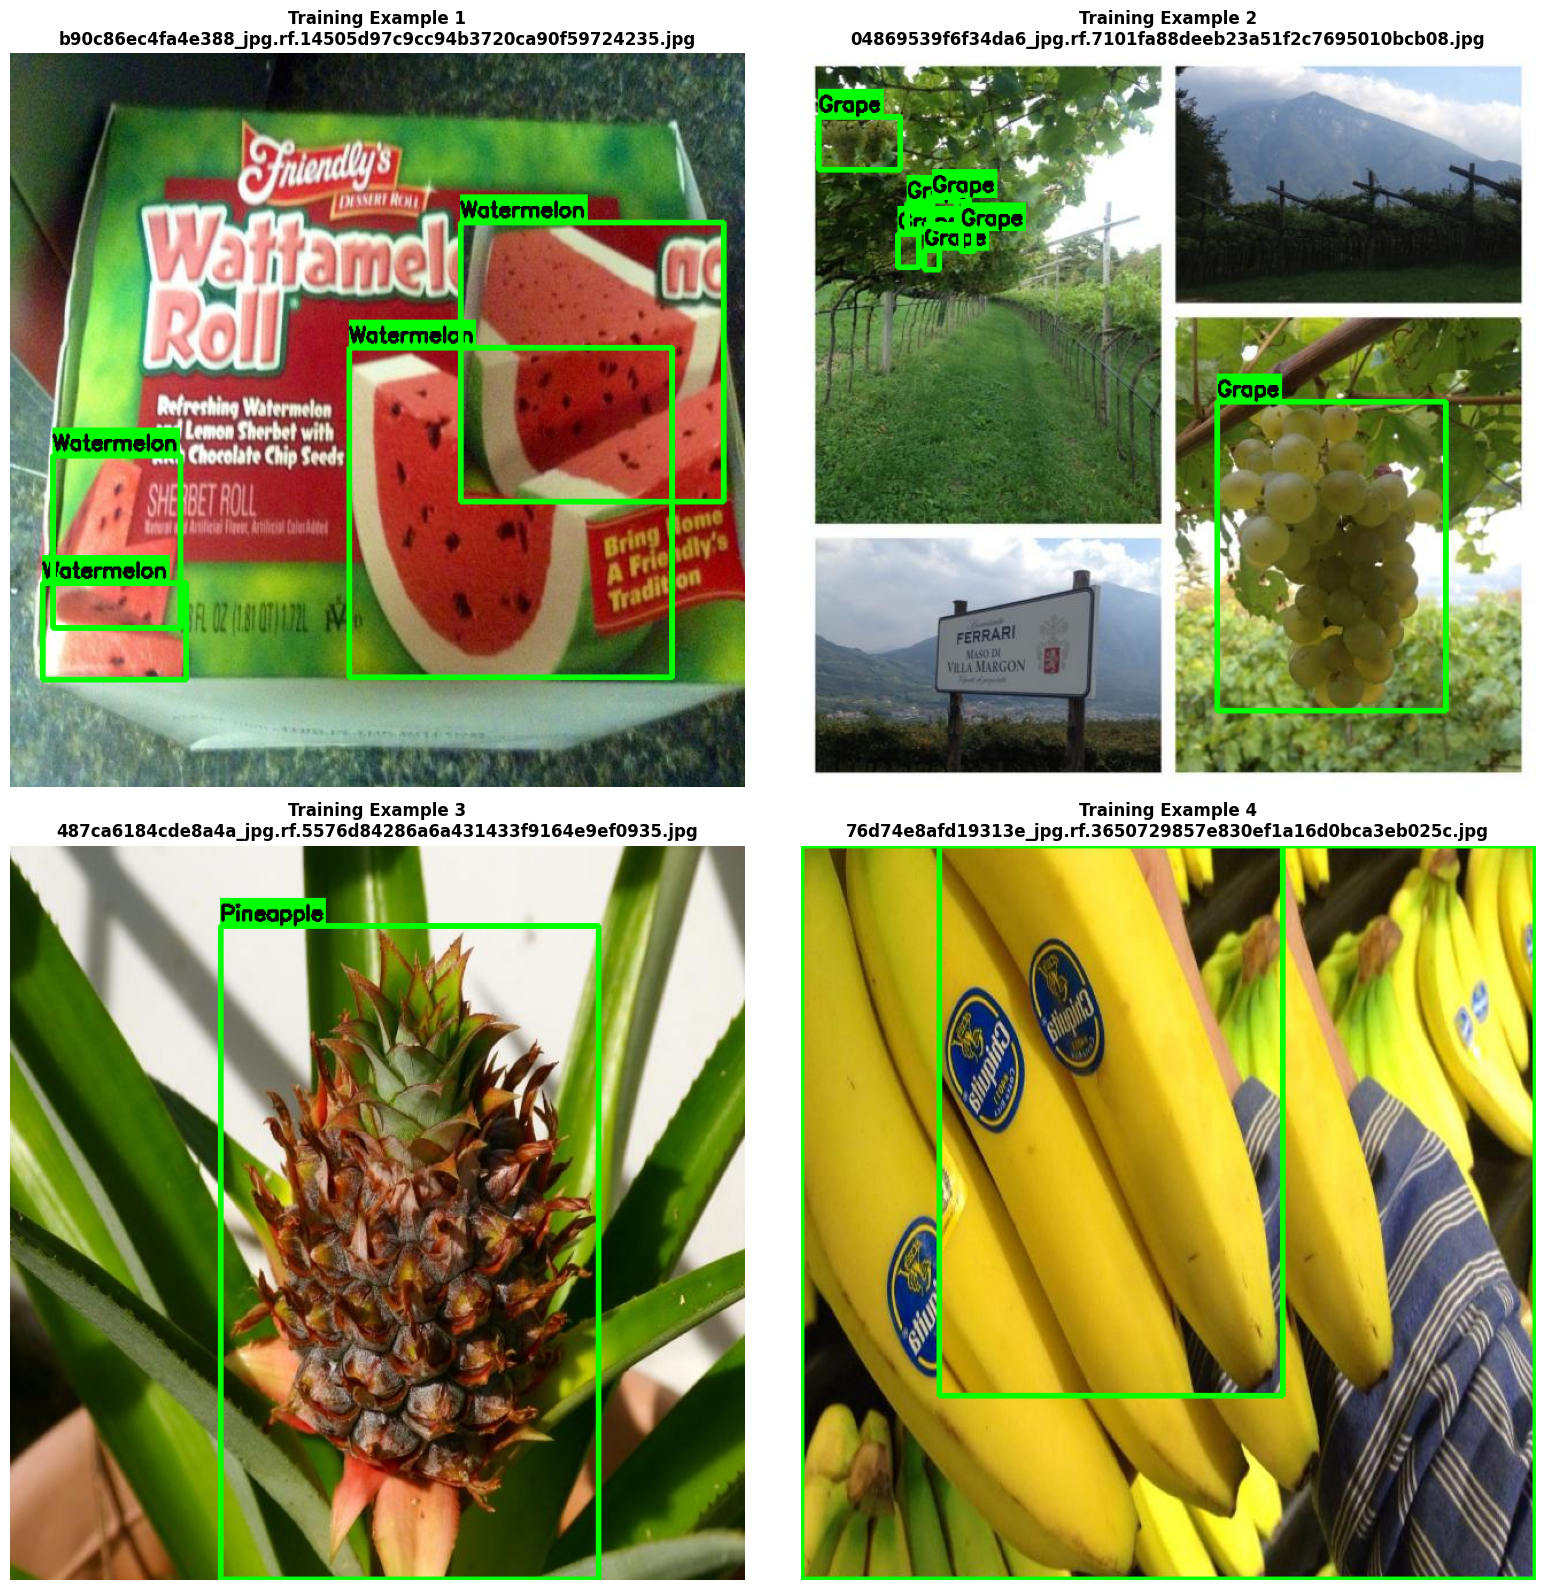


✅ Visualizadas 4 imágenes de ejemplo


In [ ]:
# ---------------------------------
# Parte 2.3 — Visualizar Ejemplos con Annotations
# ---------------------------------
train_img_dirs = list(dataset_path.glob('**/train/images')) or list(dataset_path.glob('**/images/train'))

if train_img_dirs:
    train_img_path = train_img_dirs[0]
    train_images_list = list(train_img_path.glob('*.jpg')) + list(train_img_path.glob('*.png'))

    print(f"\n=== VISUALIZANDO EJEMPLOS ===")
    print(f"Encontradas {len(train_images_list)} imágenes de training")

    def visualize_sample(image_path, label_path, class_names):
        img = cv2.imread(str(image_path))
        if img is None:
            print(f"⚠️ No se pudo leer imagen: {image_path}")
            return None

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img_rgb.shape[:2]

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        class_id = int(parts[0])
                        x_center, y_center, width, height = map(float, parts[1:5])

                        x1 = int((x_center - width/2) * w)
                        y1 = int((y_center - height/2) * h)
                        x2 = int((x_center + width/2) * w)
                        y2 = int((y_center + height/2) * h)

                        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)
                        if class_id < len(class_names):
                            label = class_names[class_id]
                            (label_w, label_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
                            cv2.rectangle(img_rgb, (x1, y1-label_h-10), (x1+label_w, y1), (0, 255, 0), -1)
                            cv2.putText(img_rgb, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)

        return img_rgb

    num_samples = min(4, len(train_images_list))
    if num_samples > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 16))
        axes = axes.flatten()
        sample_images = random.sample(train_images_list, num_samples)

        for i, img_path in enumerate(sample_images):
            label_path = str(img_path).replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.png', '.txt')
            img_with_boxes = visualize_sample(img_path, label_path, data_config['names'])
            if img_with_boxes is not None:
                axes[i].imshow(img_with_boxes)
                axes[i].axis('off')
                axes[i].set_title(f'Training Example {i+1}\n{img_path.name}', fontsize=12, fontweight='bold')
        for i in range(num_samples, 4):
            axes[i].axis('off')
        plt.tight_layout()
        plt.show()
        print(f"\n✅ Visualizadas {num_samples} imágenes de ejemplo")
    else:
        print("⚠️ No se encontraron imágenes. Verifica la estructura del dataset.")
else:
    print("⚠️ No se encontró carpeta de imágenes de training")


=== PREPARANDO FINE-TUNING ===

📄 Leyendo data.yaml: fruit_detection/Fruits-detection/data_fixed.yaml
   Config actual: {'names': ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon'], 'nc': 6, 'path': '/content/fruit_detection/Fruits-detection', 'train': 'train/images', 'val': 'valid/images'}

📁 Dataset root: fruit_detection/Fruits-detection
✅ Detectadas rutas correctas:
   Train: train/images
   Valid: valid/images

✅ data.yaml corregido guardado en: fruit_detection/Fruits-detection/data_fixed.yaml

Config corregido:
  path: /content/fruit_detection/Fruits-detection
  train: train/images
  val: valid/images
  nc: 6
  names: ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon']

=== INICIANDO FINE-TUNING ===
⚡ Configuración ultra-rápida para clase:

🚀 Iniciando training con 1 epochs...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batc

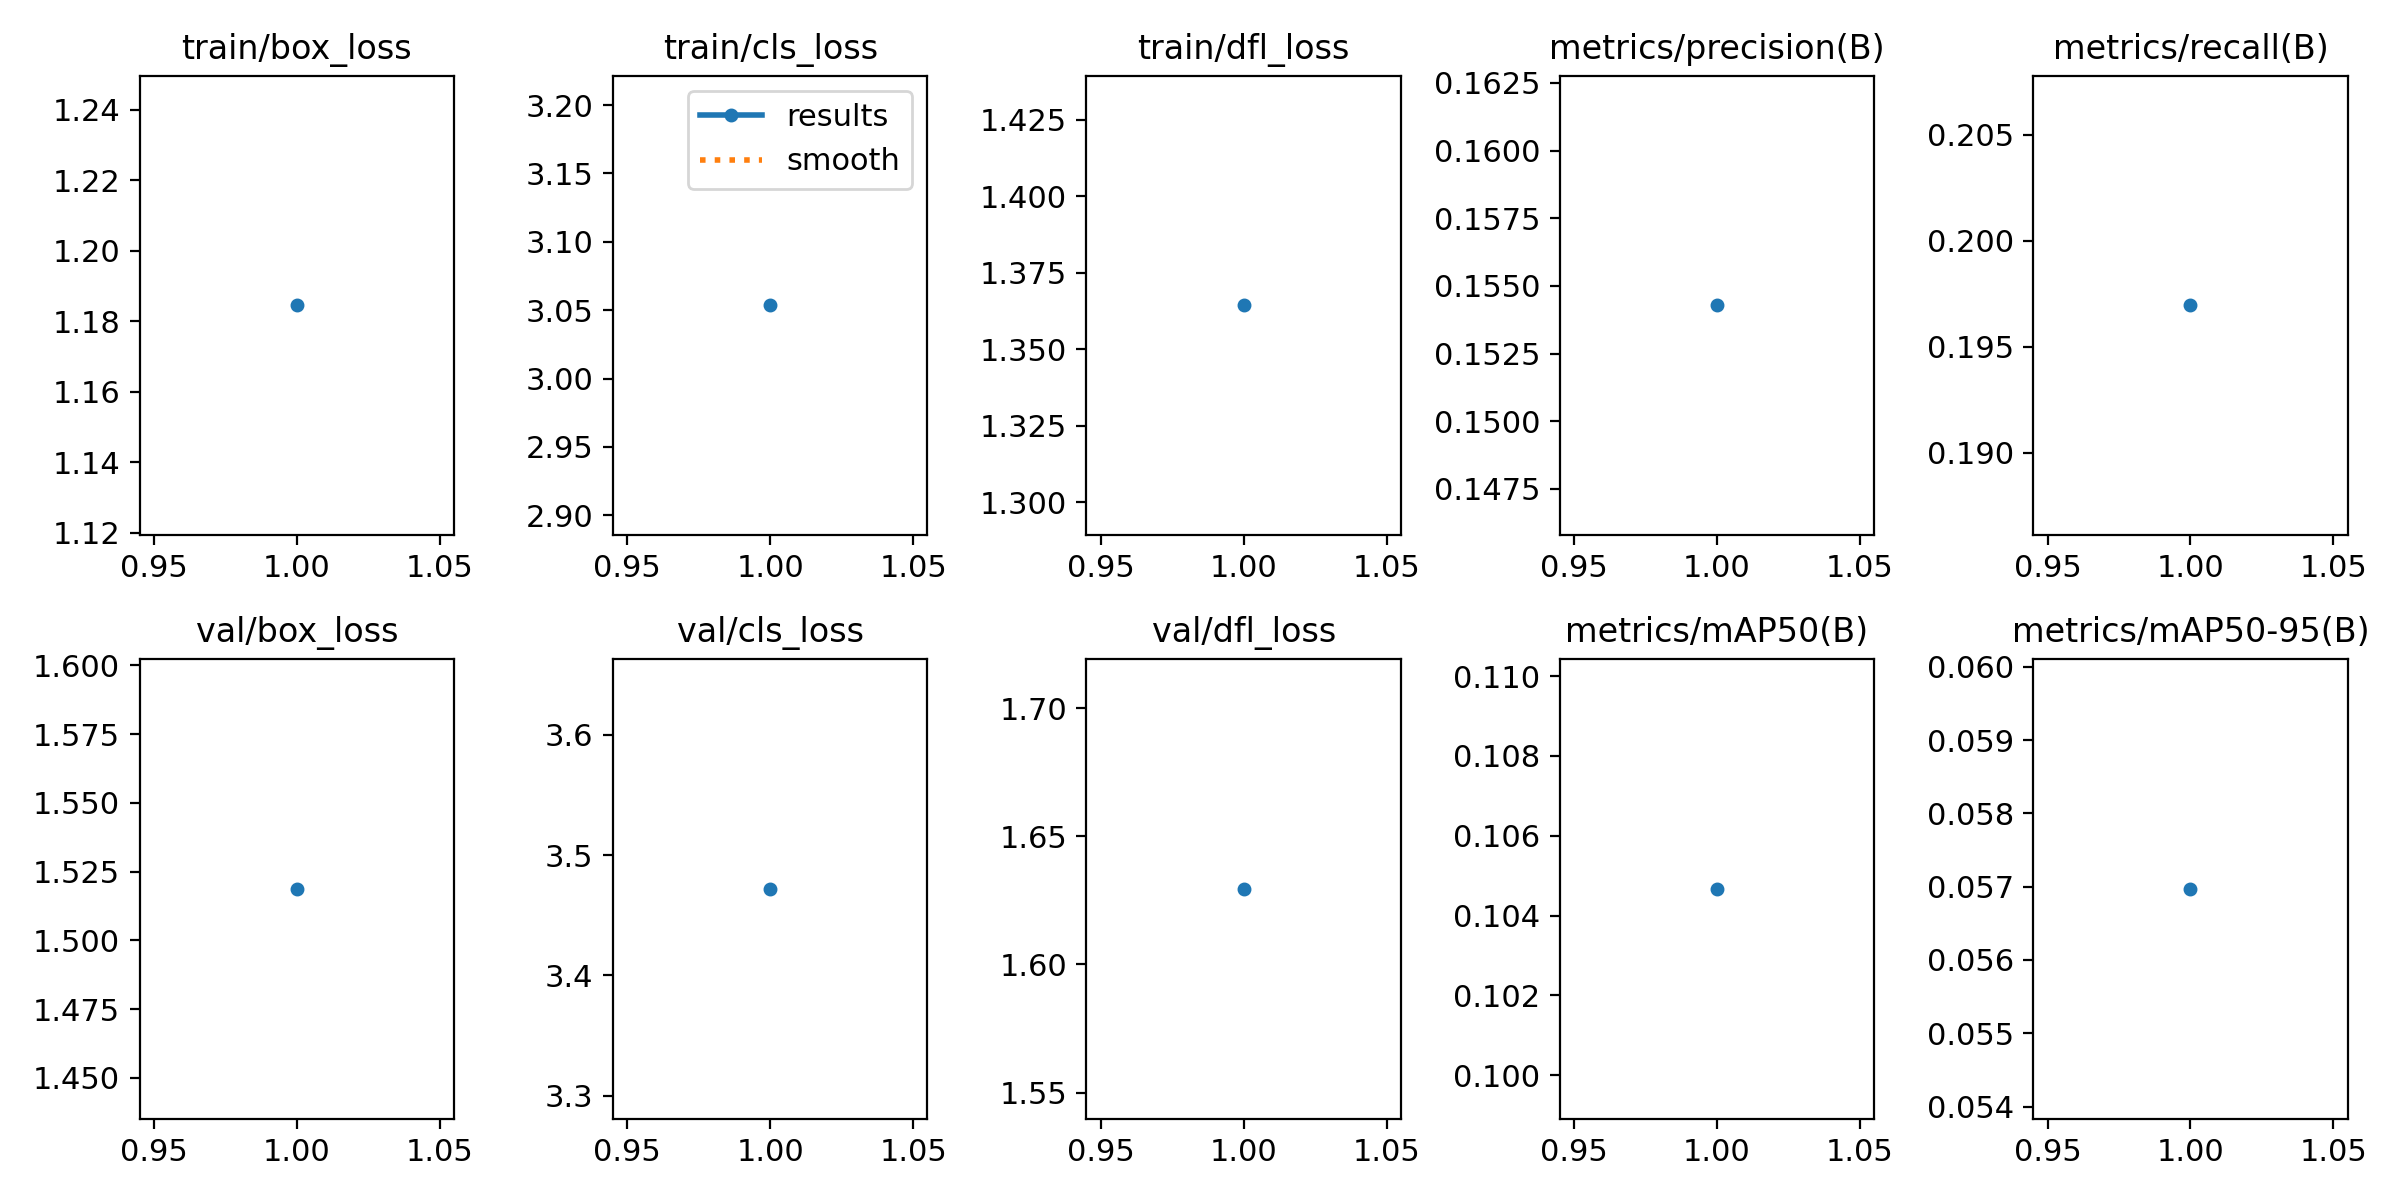

In [10]:
# ---------------------------------
# Parte 2.4 — Arreglar data.yaml y Fine-tuning
# ---------------------------------
print("\n=== PREPARANDO FINE-TUNING ===")

if 'yaml_path_str' not in locals():
    yaml_path_str = str(dataset_path / 'data.yaml')
    print(f"⚠️ Usando path por defecto: {yaml_path_str}")

print(f"\n📄 Leyendo data.yaml: {yaml_path_str}")
with open(yaml_path_str, 'r') as f:
    data_config_current = yaml.safe_load(f)
print(f"   Config actual: {data_config_current}")

dataset_root = Path(yaml_path_str).parent
print(f"\n📁 Dataset root: {dataset_root}")

train_img_dirs = list(dataset_root.glob('**/train/images')) or list(dataset_root.glob('**/images/train'))
valid_img_dirs = list(dataset_root.glob('**/valid/images')) or list(dataset_root.glob('**/val/images'))

if train_img_dirs and valid_img_dirs:
    train_path = str(train_img_dirs[0].relative_to(dataset_root))
    valid_path = str(valid_img_dirs[0].relative_to(dataset_root))
    print(f"✅ Detectadas rutas correctas:")
    print(f"   Train: {train_path}")
    print(f"   Valid: {valid_path}")
else:
    train_path = 'train/images'
    valid_path = 'valid/images'
    print(f"⚠️ Usando rutas por defecto: {train_path}, {valid_path}")

data_config_fixed = {
    'path': str(dataset_root.absolute()),
    'train': train_path,
    'val': valid_path,
    'nc': data_config_current.get('nc', 6),
    'names': data_config_current.get('names', ['apple', 'banana', 'grapes', 'orange', 'pineapple', 'watermelon'])
}

yaml_fixed_path = dataset_root / 'data_fixed.yaml'
with open(yaml_fixed_path, 'w') as f:
    yaml.dump(data_config_fixed, f, default_flow_style=False)

print(f"\n✅ data.yaml corregido guardado en: {yaml_fixed_path}")
print(f"\nConfig corregido:")
for key, value in data_config_fixed.items():
    print(f"  {key}: {value}")

yaml_path_str = str(yaml_fixed_path)

print(f"\n=== INICIANDO FINE-TUNING ===")
print("⚡ Configuración ultra-rápida para clase:")

# Hiperparámetros sugeridos para Colab (rápido)
EPOCHS = 1          # 10-20 si hay más tiempo
BATCH_SIZE = 5      # 16 o 32 (si hay más VRAM)
IMAGE_SIZE = 640     # 640 por defecto en YOLOv8
FRACTION = 0.25      # usar 25% del dataset para rapidez

model = YOLO('yolov8n.pt')

print(f"\n🚀 Iniciando training con {EPOCHS} epochs...")
results = model.train(
    data=yaml_path_str,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    fraction=FRACTION,
    name='fruit_finetuned',
    patience=5,
    save=True,
    plots=True,
    device=0 if torch.cuda.is_available() else 'cpu',
    project='runs/detect',
    verbose=True
)

print("\n✅ Fine-tuning completado!")
training_dir = results.save_dir
print(f"   Modelo guardado en: {training_dir}")
print(f"   Weights: {training_dir}/weights/best.pt")

results_png = f"{training_dir}/results.png"
print("\n📊 Gráficos de training guardados en:")
print(f"   {results_png}")
if os.path.exists(results_png):
    print("\n=== RESULTADOS DEL TRAINING ===")
    display(Image(filename=results_png))
else:
    print(f"⚠️ Gráficos no encontrados en {results_png}")

In [11]:
# ---------------------------------
# Parte 2.5 — Cargar Modelo Fine-tuned
# ---------------------------------
best_weights_path = f"{training_dir}/weights/best.pt"  # o 'last.pt' si querés el último
print(f"\n=== CARGANDO MODELO FINE-TUNED ===")
print(f"Path: {best_weights_path}")

model_finetuned = YOLO(best_weights_path)
print("\n✅ Modelo fine-tuned cargado")
print(f"   Clases: {list(model_finetuned.names.values())}")
print(f"   Total de clases: {len(model_finetuned.names)}")

print("\n📊 Comparación:")
print(f"   Modelo base (COCO): 80 clases (genéricas)")
print(f"   Modelo fine-tuned: {len(model_finetuned.names)} clases (frutas específicas)")



=== CARGANDO MODELO FINE-TUNED ===
Path: /content/runs/detect/fruit_finetuned2/weights/best.pt

✅ Modelo fine-tuned cargado
   Clases: ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon']
   Total de clases: 6

📊 Comparación:
   Modelo base (COCO): 80 clases (genéricas)
   Modelo fine-tuned: 6 clases (frutas específicas)


In [12]:
# ---------------------------------
# Parte 2.6 — Métricas de Evaluación
# ---------------------------------
print("\n=== EVALUACIÓN EN VALIDATION SET ===")
metrics = model_finetuned.val()
print(f"\n📊 MÉTRICAS DEL MODELO FINE-TUNED:")
print(f"  mAP@0.5:      {metrics.box.map50:.3f}")
print(f"  mAP@0.5:0.95: {metrics.box.map:.3f}")
print(f"  Precision:    {metrics.box.mp:.3f}")
print(f"  Recall:       {metrics.box.mr:.3f}")

print(f"\n=== MÉTRICAS POR CLASE ===")
for i, class_name in enumerate(model_finetuned.names.values()):
    if i < len(metrics.box.maps):
        print(f"{class_name:20s}: mAP@0.5 = {metrics.box.maps[i]:.3f}")


=== EVALUACIÓN EN VALIDATION SET ===
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1076.2±264.4 MB/s, size: 54.5 KB)
val: Scanning /content/fruit_detection/Fruits-detection/valid/labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 914/914 1.0Mit/s 0.0s
val: /content/fruit_detection/Fruits-detection/valid/images/3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 58/58 0.2it/s 3:59
                   all        914       3227      0.149      0.199      0.105      0.057
                 Apple        188        557      0.263      0.147      0.111     0.0701
                Banana        167        390        0.2      0.238      0.114     0.0498
             


=== COMPARACIÓN: BASE vs FINE-TUNED ===
Comparando en 3 imágenes del validation set


Imagen 1/3: 3d1e997cc33a227a_jpg.rf.d40cf72d64158611e44ea033abd5b0a9.jpg
  Modelo Base (COCO):   0 detecciones
  Modelo Fine-tuned:    3 detecciones
  Diferencia:          +3
  Clases (Fine-tuned): Grape


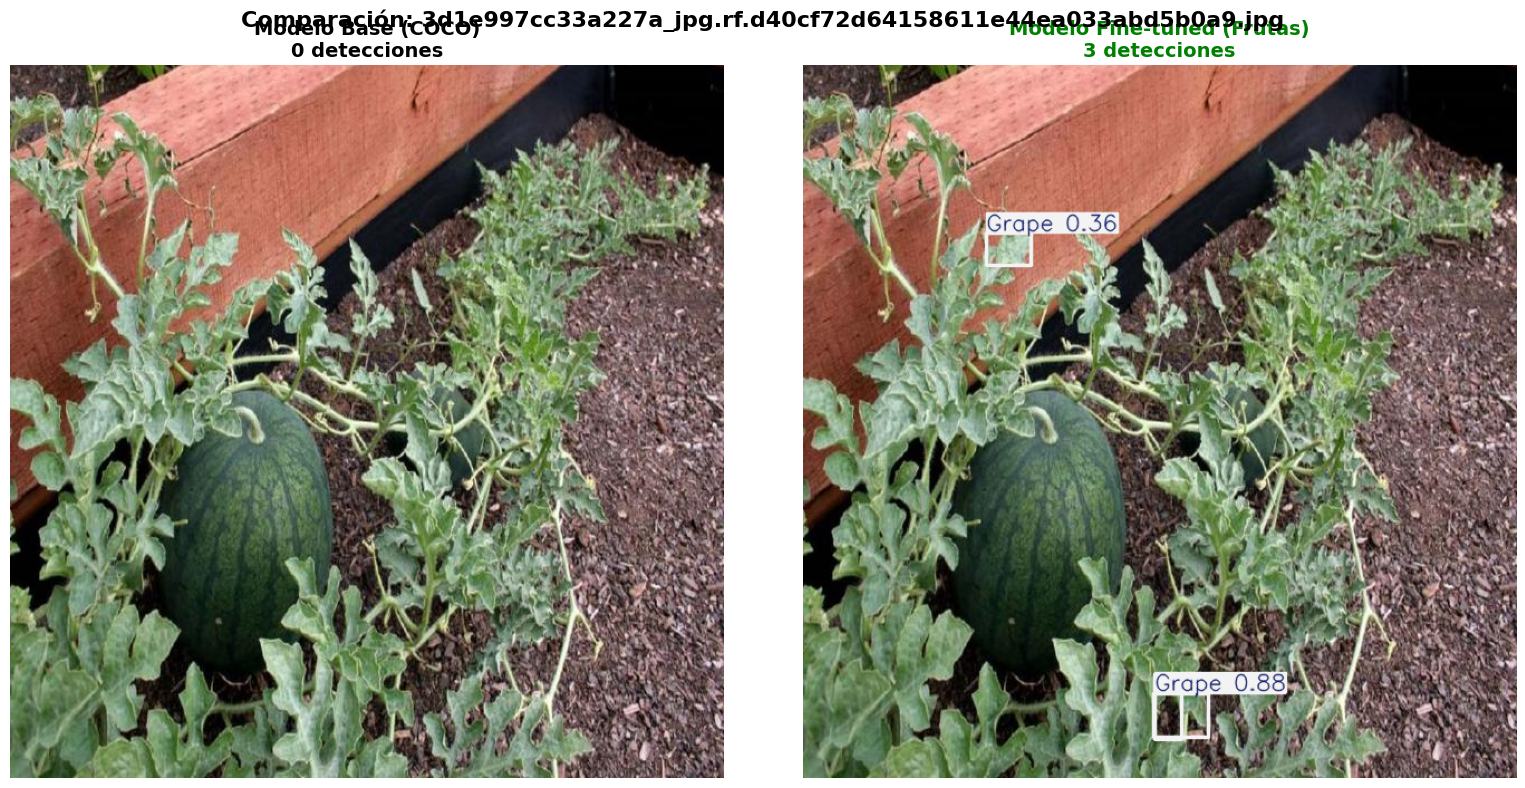


Imagen 2/3: 02c650448283df97_jpg.rf.90c85d0a506f1bbb758e6a1fc2c3fe9d.jpg
  Modelo Base (COCO):   2 detecciones
  Modelo Fine-tuned:    6 detecciones
  Diferencia:          +4
  Clases (Base):       umbrella, truck
  Clases (Fine-tuned): Grape, Orange


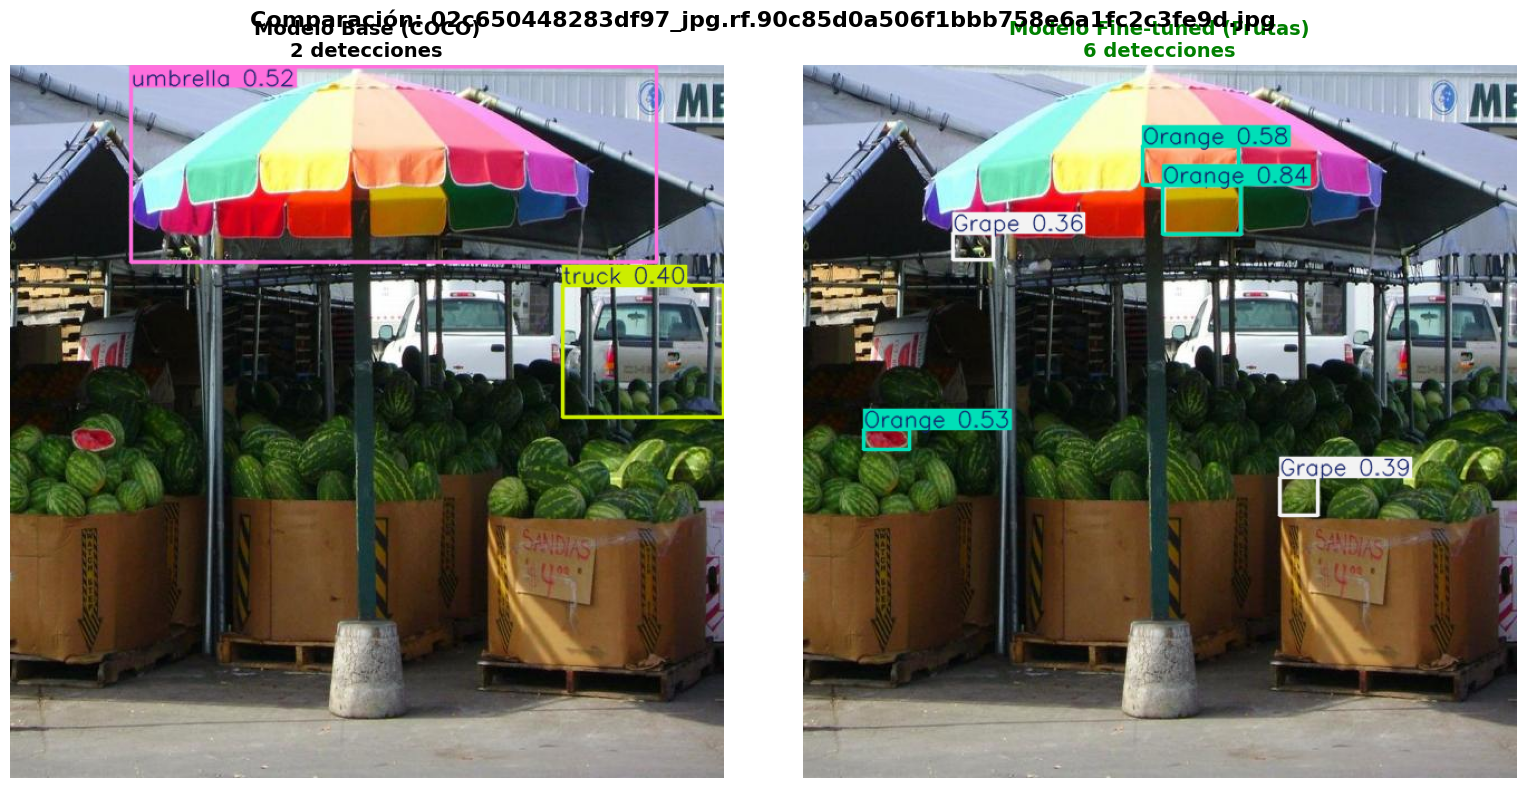


Imagen 3/3: 6f75c152dff723ce_jpg.rf.47881adeb22e9ee08235ae0b2d8293f5.jpg
  Modelo Base (COCO):   1 detecciones
  Modelo Fine-tuned:    0 detecciones
  Diferencia:          -1
  Clases (Base):       sandwich


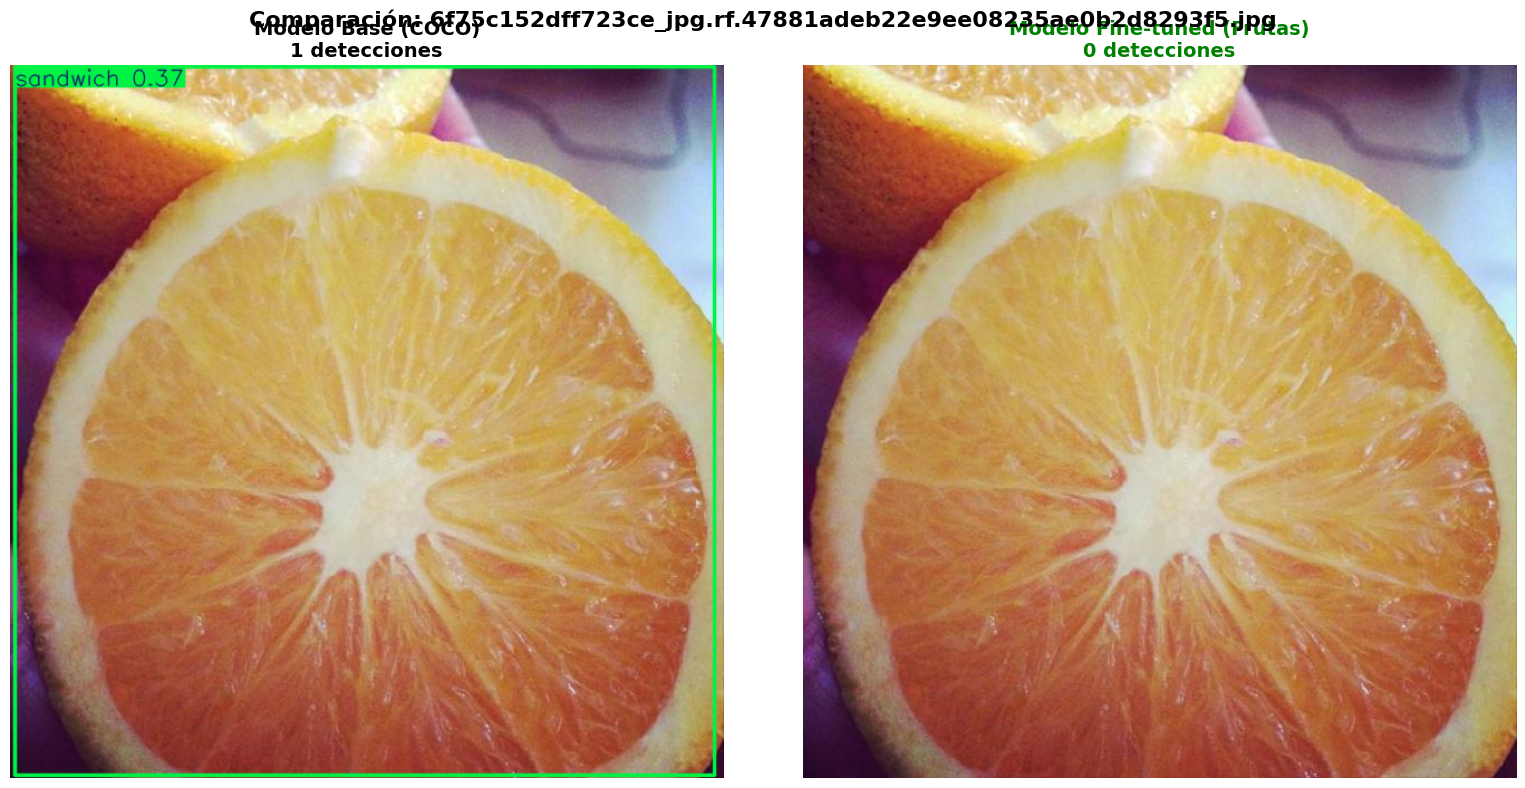


✅ Comparación completada


In [13]:
# ---------------------------------
# Parte 2.7 — Comparación Antes vs Después (visual)
# ---------------------------------
val_img_dirs = list(dataset_path.glob('**/valid/images')) or list(dataset_path.glob('**/val/images'))

if val_img_dirs:
    val_img_path = val_img_dirs[0]
    val_images_list = list(val_img_path.glob('*.jpg')) + list(val_img_path.glob('*.png'))
    num_samples = min(3, len(val_images_list))
    test_images_list = random.sample(val_images_list, num_samples)

    print(f"\n=== COMPARACIÓN: BASE vs FINE-TUNED ===")
    print(f"Comparando en {num_samples} imágenes del validation set\n")

    for idx, p in enumerate(test_images_list):
        img_name = p.name
        print(f"\n{'='*60}")
        print(f"Imagen {idx+1}/{num_samples}: {img_name}")

        results_base = model_base(str(p), conf=0.3, verbose=False)
        n_detections_base = len(results_base[0].boxes)

        results_finetuned = model_finetuned(str(p), conf=0.3, verbose=False)
        n_detections_finetuned = len(results_finetuned[0].boxes)

        print(f"  Modelo Base (COCO):  {n_detections_base:2d} detecciones")
        print(f"  Modelo Fine-tuned:   {n_detections_finetuned:2d} detecciones")
        print(f"  Diferencia:          {n_detections_finetuned - n_detections_base:+d}")

        if n_detections_base > 0:
            base_classes = [model_base.names[int(b.cls[0])] for b in results_base[0].boxes]
            print(f"  Clases (Base):       {', '.join(set(base_classes))}")

        if n_detections_finetuned > 0:
            ft_classes = [model_finetuned.names[int(b.cls[0])] for b in results_finetuned[0].boxes]
            print(f"  Clases (Fine-tuned): {', '.join(set(ft_classes))}")

        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        annotated_base = results_base[0].plot()
        axes[0].imshow(cv2.cvtColor(annotated_base, cv2.COLOR_BGR2RGB))
        axes[0].axis('off')
        axes[0].set_title(f'Modelo Base (COCO)\n{n_detections_base} detecciones', fontsize=14, fontweight='bold')

        annotated_finetuned = results_finetuned[0].plot()
        axes[1].imshow(cv2.cvtColor(annotated_finetuned, cv2.COLOR_BGR2RGB))
        axes[1].axis('off')
        axes[1].set_title(f'Modelo Fine-tuned (Frutas)\n{n_detections_finetuned} detecciones', fontsize=14, fontweight='bold', color='green')

        plt.suptitle(f'Comparación: {img_name}', fontsize=16, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.show()

    print(f"\n{'='*60}")
    print("✅ Comparación completada")
else:
    print("⚠️ No se encontraron imágenes del validation set")


=== ANÁLISIS DE ERRORES ===

=== RESULTADOS COMPARATIVOS ===

Modelo Base (COCO):
  TP: 0, FP: 3, FN: 7
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000

Modelo Fine-tuned:
  TP: 0, FP: 9, FN: 7
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000


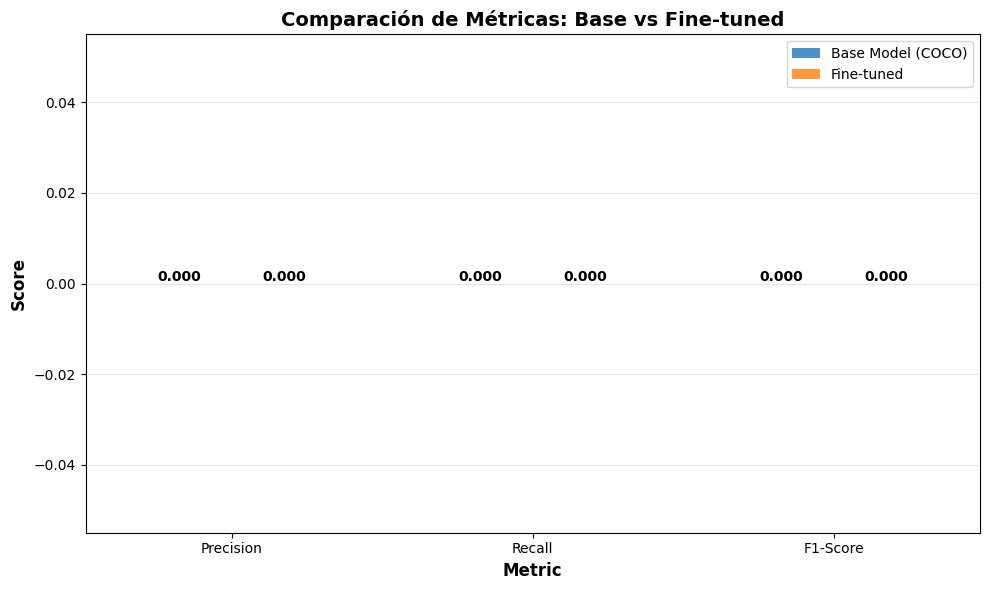

In [14]:
# ---------------------------------
# Parte 2.8 — Análisis de Errores (FP/FN)
# ---------------------------------
def calculate_iou(box1, box2):
    x1_inter = max(box1[0], box2[0]); y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2]); y2_inter = min(box1[3], box2[3])
    inter_area = (x2_inter - x1_inter) * (y2_inter - y1_inter) if (x2_inter > x1_inter and y2_inter > y1_inter) else 0
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

def calculate_metrics_from_results(results, ground_truths, iou_threshold=0.5):
    predictions = results[0].boxes
    tp = 0; fp = 0
    gt_matched = [False] * len(ground_truths)
    for pred_box in predictions:
        pred_xyxy = pred_box.xyxy[0].cpu().numpy()
        pred_cls = int(pred_box.cls[0].cpu().numpy())
        best_iou, best_gt_idx = 0, -1
        for i, gt in enumerate(ground_truths):
            if gt_matched[i]: continue
            gt_cls = gt['class_id']
            if pred_cls != gt_cls: continue
            iou = calculate_iou(pred_xyxy, gt['xyxy'])
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = i
        if best_iou >= iou_threshold and best_gt_idx >= 0:
            tp += 1; gt_matched[best_gt_idx] = True
        else:
            fp += 1
    fn = len(ground_truths) - sum(gt_matched)
    return tp, fp, fn

print("\n=== ANÁLISIS DE ERRORES ===")
total_tp_base = total_fp_base = total_fn_base = 0
total_tp_finetuned = total_fp_finetuned = total_fn_finetuned = 0

if 'test_images_list' in locals():
    num_analyze = min(10, len(test_images_list))
    for img_path in test_images_list[:num_analyze]:
        img_path_str = str(img_path)
        label_path = img_path_str.replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.png', '.txt')
        ground_truths = []
        if os.path.exists(label_path):
            img = cv2.imread(img_path_str)
            if img is None: continue
            h, w = img.shape[:2]
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        class_id = int(parts[0])
                        x_center, y_center, width, height = map(float, parts[1:5])
                        x1 = (x_center - width/2) * w; y1 = (y_center - height/2) * h
                        x2 = (x_center + width/2) * w; y2 = (y_center + height/2) * h
                        ground_truths.append({'class_id': class_id, 'xyxy': [x1, y1, x2, y2]})
        if len(ground_truths) == 0: continue

        results_base = model_base(img_path_str, conf=0.3, verbose=False)
        tp_b, fp_b, fn_b = calculate_metrics_from_results(results_base, ground_truths)

        results_finetuned = model_finetuned(img_path_str, conf=0.3, verbose=False)
        tp_f, fp_f, fn_f = calculate_metrics_from_results(results_finetuned, ground_truths)

        total_tp_base += tp_b; total_fp_base += fp_b; total_fn_base += fn_b
        total_tp_finetuned += tp_f; total_fp_finetuned += fp_f; total_fn_finetuned += fn_f

precision_base = total_tp_base / (total_tp_base + total_fp_base) if (total_tp_base + total_fp_base) > 0 else 0
recall_base = total_tp_base / (total_tp_base + total_fn_base) if (total_tp_base + total_fn_base) > 0 else 0
f1_base = 2 * (precision_base * recall_base) / (precision_base + recall_base) if (precision_base + recall_base) > 0 else 0

precision_finetuned = total_tp_finetuned / (total_tp_finetuned + total_fp_finetuned) if (total_tp_finetuned + total_fp_finetuned) > 0 else 0
recall_finetuned = total_tp_finetuned / (total_tp_finetuned + total_fn_finetuned) if (total_tp_finetuned + total_fn_finetuned) > 0 else 0
f1_finetuned = 2 * (precision_finetuned * recall_finetuned) / (precision_finetuned + recall_finetuned) if (precision_finetuned + recall_finetuned) > 0 else 0

print(f"\n=== RESULTADOS COMPARATIVOS ===")
print(f"\nModelo Base (COCO):")
print(f"  TP: {total_tp_base}, FP: {total_fp_base}, FN: {total_fn_base}")
print(f"  Precision: {precision_base:.3f}")
print(f"  Recall:    {recall_base:.3f}")
print(f"  F1-Score:  {f1_base:.3f}")

print(f"\nModelo Fine-tuned:")
print(f"  TP: {total_tp_finetuned}, FP: {total_fp_finetuned}, FN: {total_fn_finetuned}")
print(f"  Precision: {precision_finetuned:.3f}")
print(f"  Recall:    {recall_finetuned:.3f}")
print(f"  F1-Score:  {f1_finetuned:.3f}")

metrics_comparison = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Base Model': [precision_base, recall_base, f1_base],
    'Fine-tuned': [precision_finetuned, recall_finetuned, f1_finetuned]
})

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_comparison))
width = 0.35
bars1 = ax.bar(x - width/2, metrics_comparison['Base Model'], width, label='Base Model (COCO)', alpha=0.8)
bars2 = ax.bar(x + width/2, metrics_comparison['Fine-tuned'], width, label='Fine-tuned', alpha=0.8)
ax.set_xlabel('Metric', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Métricas: Base vs Fine-tuned', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison['Metric'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


In [15]:
# ---------------------------------
# Parte 3.1 — Descargar Video de Frutas
# ---------------------------------
print("=== DESCARGANDO VIDEO PARA TRACKING ===")
print("Video de frutas en cinta transportadora\n")

!mkdir -p videos
import gdown
file_id = '1xPxrNgaCp2ECVIuHw5HZuAWL_vEbyvZ9'
video_path = 'videos/fruits_tracking.mp4'
print("📥 Descargando video...")
gdown.download(f'https://drive.google.com/uc?id={file_id}', video_path, quiet=False)

fps = 30; frame_count = 0; width = 640; height = 480
if os.path.exists(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS) or 30
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) or 0)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) or 640)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) or 480)
    cap.release()
    print(f"\n✅ Video descargado exitosamente:")
    print(f"   Path: {video_path}")
    print(f"   FPS: {fps}")
    print(f"   Frames: {frame_count}")
    print(f"   Resolución: {width}×{height}")
    if fps > 0 and frame_count > 0:
        print(f"   Duración: {frame_count/fps:.1f} segundos")
else:
    print("❌ Error: No se pudo descargar el video")
    video_path = None

=== DESCARGANDO VIDEO PARA TRACKING ===
Video de frutas en cinta transportadora

📥 Descargando video...


Downloading...
From: https://drive.google.com/uc?id=1xPxrNgaCp2ECVIuHw5HZuAWL_vEbyvZ9
To: /content/videos/fruits_tracking.mp4
100%|██████████| 833k/833k [00:00<00:00, 97.8MB/s]


✅ Video descargado exitosamente:
   Path: videos/fruits_tracking.mp4
   FPS: 29.97002997002997
   Frames: 343
   Resolución: 768×432
   Duración: 11.4 segundos


In [16]:
# ---------------------------------
# Parte 3.2 — Configurar Norfair Tracker
# ---------------------------------
from norfair import Detection, Tracker
from norfair.distances import mean_euclidean

print("=== CONFIGURANDO NORFAIR TRACKER ===")
tracker = Tracker(
    distance_function=mean_euclidean,
    distance_threshold=100,   # píxeles
    hit_counter_max=30,       # ~1s a 30 FPS
    initialization_delay=2
)

=== CONFIGURANDO NORFAIR TRACKER ===


In [17]:
# ---------------------------------
# Parte 3.3 — Aplicar Tracking en Video
# ---------------------------------
if video_path and os.path.exists(video_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_path = 'videos/grocery_tracked.mp4'
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_idx = 0
    track_history = {}
    detections_per_frame = []
    class_counts_per_frame = []

    print(f"\n🎬 Procesando video con tracking...")
    print(f"   Modelo: Fine-tuned")
    print(f"   Esto puede tomar 1-2 minutos...")

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret: break

        # Conf más bajo para tracking consistente
        results = model_finetuned(frame, conf=0.25, verbose=False)

        norfair_detections = []
        if len(results[0].boxes) > 0:
            boxes = results[0].boxes.xyxy.cpu().numpy()
            classes = results[0].boxes.cls.cpu().numpy().astype(int)
            for box, class_id in zip(boxes, classes):
                points = np.array([[box[0], box[1]], [box[2], box[3]]])
                detection = Detection(points=points, data={"class_id": int(class_id)})
                norfair_detections.append(detection)

        tracked_objects = tracker.update(detections=norfair_detections)
        detections_per_frame.append(len(tracked_objects))
        class_count = {}

        for tracked_obj in tracked_objects:
            if tracked_obj.last_detection is not None and tracked_obj.last_detection.data:
                points = tracked_obj.estimate
                x1, y1 = int(points[0][0]), int(points[0][1])
                x2, y2 = int(points[1][0]), int(points[1][1])
                track_id = tracked_obj.id
                class_id = tracked_obj.last_detection.data.get("class_id")
                if class_id is None: continue
                class_name = model_finetuned.names[class_id]
                class_count[class_name] = class_count.get(class_name, 0) + 1
                color = tuple([int(c * 255) for c in plt.cm.tab10(track_id % 10)[:3]])
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)
                label = f'ID{track_id}: {class_name}'
                (lw, lh), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
                cv2.rectangle(frame, (x1, y1 - lh - 15), (x1 + lw + 10, y1), color, -1)
                cv2.putText(frame, label, (x1 + 5, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)
                if track_id not in track_history:
                    track_history[track_id] = {'frames': [], 'class': class_name}
                track_history[track_id]['frames'].append(frame_idx)

        class_counts_per_frame.append(class_count if len(tracked_objects)>0 else {})
        info_text = f"Frame: {frame_idx}/{frame_count} | Productos: {detections_per_frame[-1]}"
        cv2.putText(frame, info_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        out.write(frame)

        frame_idx += 1
        if frame_idx % 30 == 0:
            print(f"     Procesados {frame_idx}/{frame_count} frames ({(frame_idx/(frame_count or 1))*100:.1f}%)")

    cap.release()
    out.release()

    print(f"\n✅ Video tracking completado!")
    print(f"   Output guardado: {output_path}")
    print(f"   Total tracks creados: {len(track_history)}")
else:
    print("⚠️ Video no encontrado / no descargado")



🎬 Procesando video con tracking...
   Modelo: Fine-tuned
   Esto puede tomar 1-2 minutos...
     Procesados 30/343 frames (8.7%)
     Procesados 60/343 frames (17.5%)
     Procesados 90/343 frames (26.2%)
     Procesados 120/343 frames (35.0%)
     Procesados 150/343 frames (43.7%)
     Procesados 180/343 frames (52.5%)
     Procesados 210/343 frames (61.2%)
     Procesados 240/343 frames (70.0%)
     Procesados 270/343 frames (78.7%)
     Procesados 300/343 frames (87.5%)
     Procesados 330/343 frames (96.2%)

✅ Video tracking completado!
   Output guardado: videos/grocery_tracked.mp4
   Total tracks creados: 20



ESTADÍSTICAS DE TRACKING

📊 Estadísticas generales:
  Total productos trackeados: 20
  Duración promedio: 80.2 frames (2.7s)
  Duración máxima: 341 frames (11.4s)
  Duración mínima: 4 frames (0.1s)

📋 Detalle por producto trackeado:
Track ID     Clase                Duración        Rango Frames        
----------------------------------------------------------------------
Track 1      Orange                341 frames (11.4s)    2 → 342 
Track 2      Banana                102 frames ( 3.4s)    7 → 108 
Track 3      Apple                  86 frames ( 2.9s)    8 → 93  
Track 4      Grape                 149 frames ( 5.0s)    9 → 157 
Track 5      Banana                230 frames ( 7.7s)   50 → 279 
Track 6      Banana                 48 frames ( 1.6s)  106 → 153 
Track 7      Banana                 14 frames ( 0.5s)  108 → 121 
Track 8      Orange                 32 frames ( 1.1s)  116 → 147 
Track 9      Banana                 10 frames ( 0.3s)  134 → 143 
Track 10     Banana           

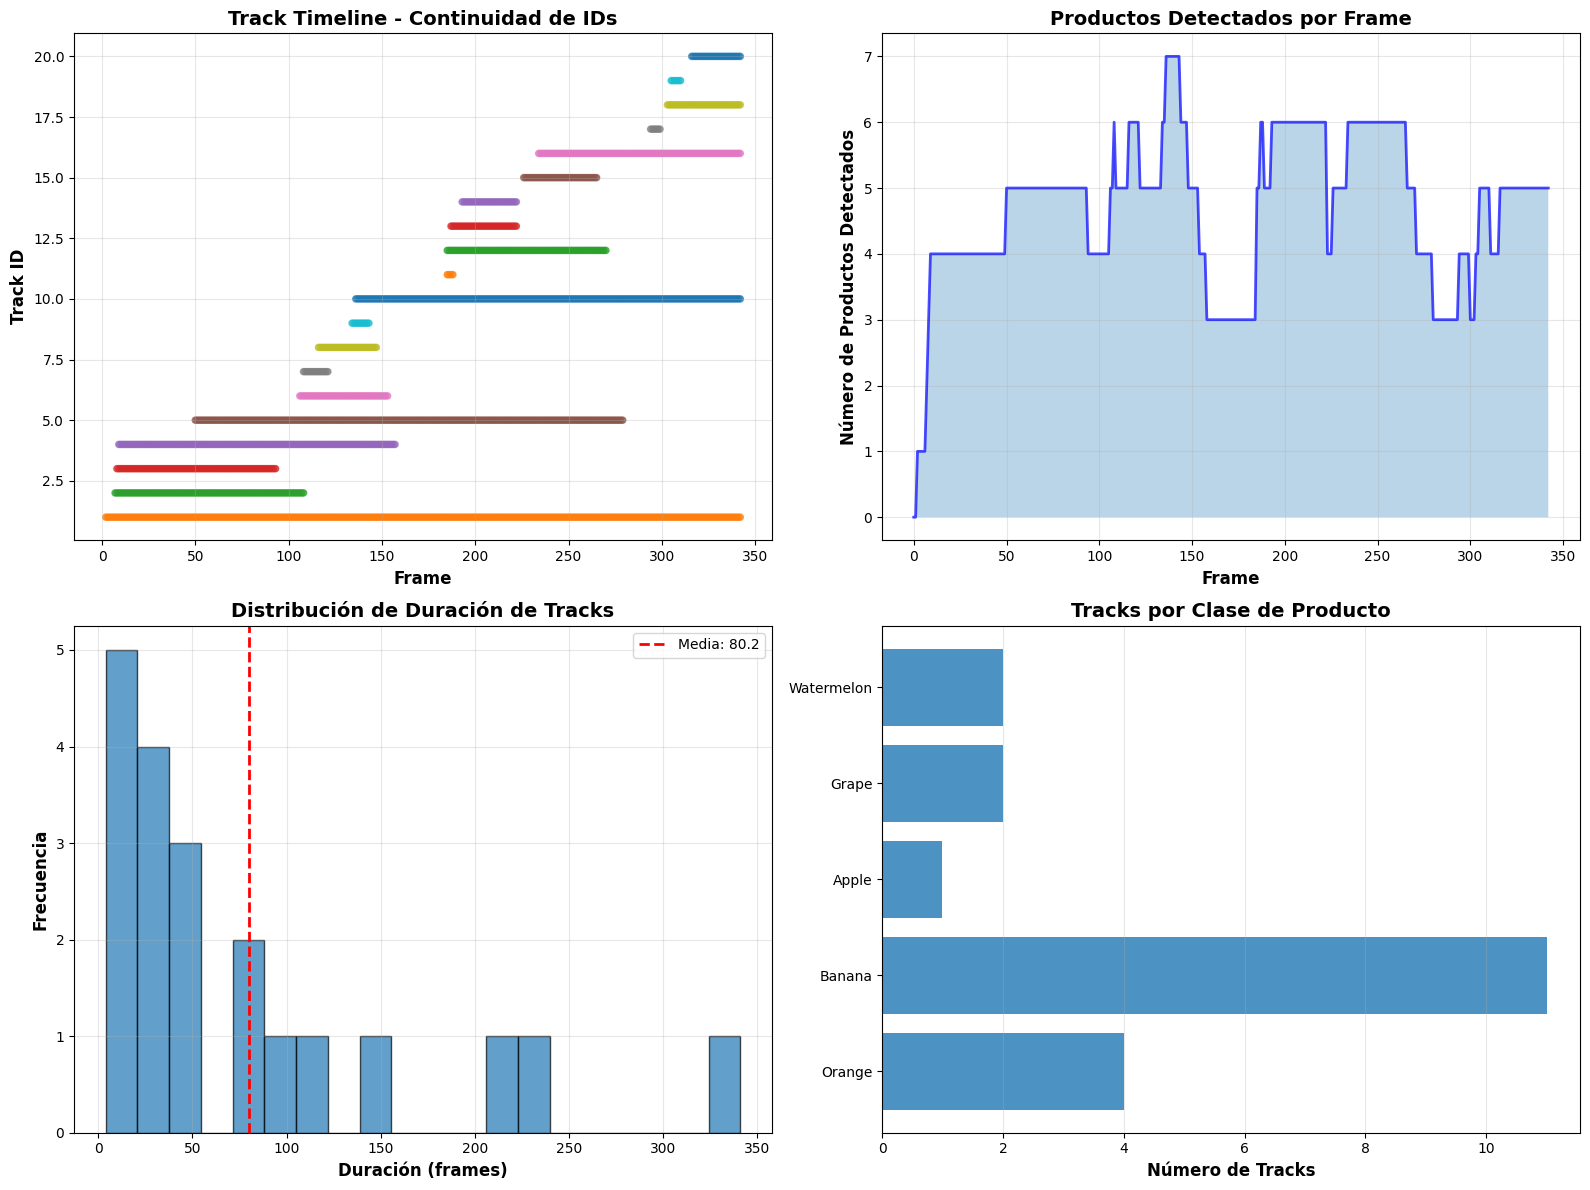


⚡ Métricas de calidad del tracking:
  Tracks cortos (<1s):  6 (30.0%)
  Tracks largos (>3s):  6 (30.0%)
  Tracks totales:       20


In [18]:
# ---------------------------------
# Parte 3.5 — Análisis de Tracking
# ---------------------------------
print("\n" + "=" * 70)
print("ESTADÍSTICAS DE TRACKING")
print("=" * 70)

if 'track_history' in locals() and len(track_history) > 0:
    all_durations = [len(info['frames']) for info in track_history.values()]
    avg_duration = float(np.mean(all_durations))
    max_duration = max(all_durations)
    min_duration = min(all_durations)

    print(f"\n📊 Estadísticas generales:")
    print(f"  Total productos trackeados: {len(track_history)}")
    print(f"  Duración promedio: {avg_duration:.1f} frames ({avg_duration/(fps or 30):.1f}s)")
    print(f"  Duración máxima: {max_duration} frames ({max_duration/(fps or 30):.1f}s)")
    print(f"  Duración mínima: {min_duration} frames ({min_duration/(fps or 30):.1f}s)")

    print(f"\n📋 Detalle por producto trackeado:")
    print(f"{'Track ID':<12} {'Clase':<20} {'Duración':<15} {'Rango Frames':<20}")
    print("-" * 70)
    for track_id in sorted(track_history.keys()):
        info = track_history[track_id]
        frames = info['frames']
        class_name = info['class']
        duration = len(frames)
        start_frame = min(frames); end_frame = max(frames)
        print(f"Track {track_id:<6} {class_name:<20} {duration:>4} frames ({duration/(fps or 30):>4.1f}s) "
              f"{start_frame:>4} → {end_frame:<4}")

    class_track_counts = {}
    for info in track_history.values():
        class_name = info['class']
        class_track_counts[class_name] = class_track_counts.get(class_name, 0) + 1

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    ax1 = axes[0, 0]
    for track_id, info in track_history.items():
        frames = info['frames']
        ax1.scatter(frames, [track_id]*len(frames), s=20, alpha=0.7,
                    c=[plt.cm.tab10(track_id % 10)[:3]] * len(frames))
    ax1.set_xlabel('Frame', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Track ID', fontsize=12, fontweight='bold')
    ax1.set_title('Track Timeline - Continuidad de IDs', fontsize=14, fontweight='bold')
    ax1.grid(alpha=0.3)

    ax2 = axes[0, 1]
    ax2.plot(range(len(detections_per_frame)), detections_per_frame, 'b-', alpha=0.7, linewidth=2)
    ax2.fill_between(range(len(detections_per_frame)), detections_per_frame, alpha=0.3)
    ax2.set_xlabel('Frame', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Número de Productos Detectados', fontsize=12, fontweight='bold')
    ax2.set_title('Productos Detectados por Frame', fontsize=14, fontweight='bold')
    ax2.grid(alpha=0.3)

    ax3 = axes[1, 0]
    ax3.hist(all_durations, bins=20, alpha=0.7, edgecolor='black')
    ax3.axvline(avg_duration, color='red', linestyle='--', linewidth=2, label=f'Media: {avg_duration:.1f}')
    ax3.set_xlabel('Duración (frames)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
    ax3.set_title('Distribución de Duración de Tracks', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(alpha=0.3)

    ax4 = axes[1, 1]
    classes = list(class_track_counts.keys())
    counts = list(class_track_counts.values())
    ax4.barh(classes, counts, alpha=0.8)
    ax4.set_xlabel('Número de Tracks', fontsize=12, fontweight='bold')
    ax4.set_title('Tracks por Clase de Producto', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    tracks_short = sum([1 for d in all_durations if d < (fps or 30)])
    tracks_long = sum([1 for d in all_durations if d > 3*(fps or 30)])
    print(f"\n⚡ Métricas de calidad del tracking:")
    print(f"  Tracks cortos (<1s):  {tracks_short} ({(tracks_short/len(track_history))*100:.1f}%)")
    print(f"  Tracks largos (>3s):  {tracks_long} ({(tracks_long/len(track_history))*100:.1f}%)")
    print(f"  Tracks totales:       {len(track_history)}")
else:
    print("⚠️ No se crearon tracks. Verifica el video y las detecciones.")